# It's FIRE in reverse
Track back formation locations in FIRE

In [6]:
import os

import h5py as h5
import matplotlib as mpt
import matplotlib.pyplot as plt
import numpy as np

import gala.potential as gp
from gala.units import galactic
import gala.dynamics as gd

import astropy.units as u

import sys
sys.path.append("helpers")

import tomFIRE

In [7]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Load in the data

In [8]:
recent_stars = tomFIRE.FIRESnapshot(particle_type="star", min_t_form=13.6 * u.Gyr)
recent_stars

<FIRESnapshot | 9660 star particles | R < 30.0 kpc & t_form > 13.6 Gyr>

In [9]:
pot = gp.load("m11h_potential.yml")

# Quick test of orbit generation

In [12]:
w0 = gd.PhaseSpacePosition(pos=recent_stars.X_s, vel=recent_stars.V_s)
orbits = pot.integrate_orbit(w0[:20], dt=-1 * u.Myr, n_steps=1000)

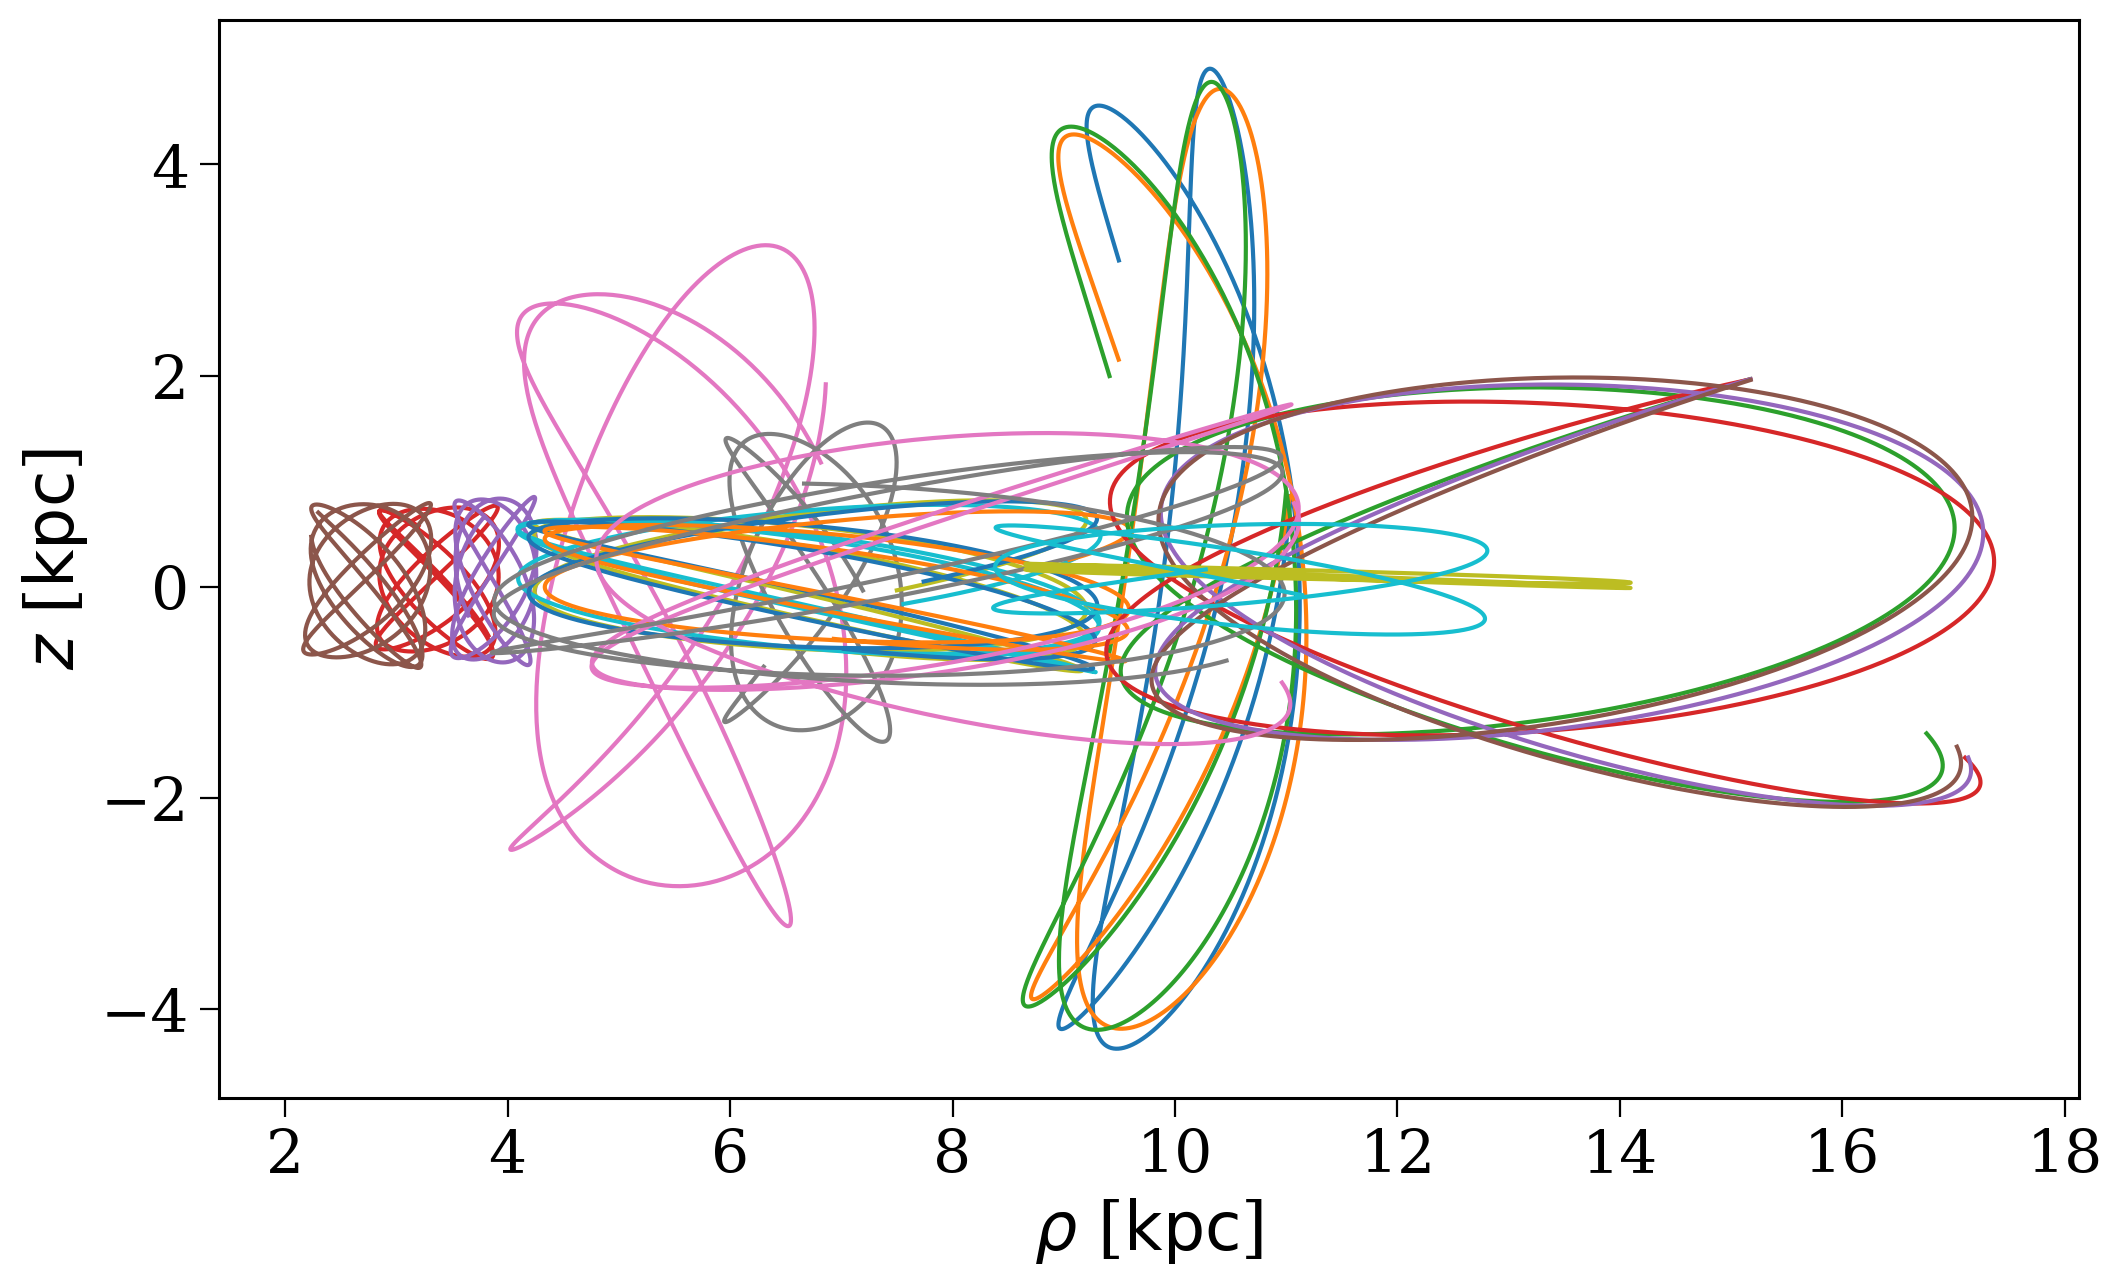

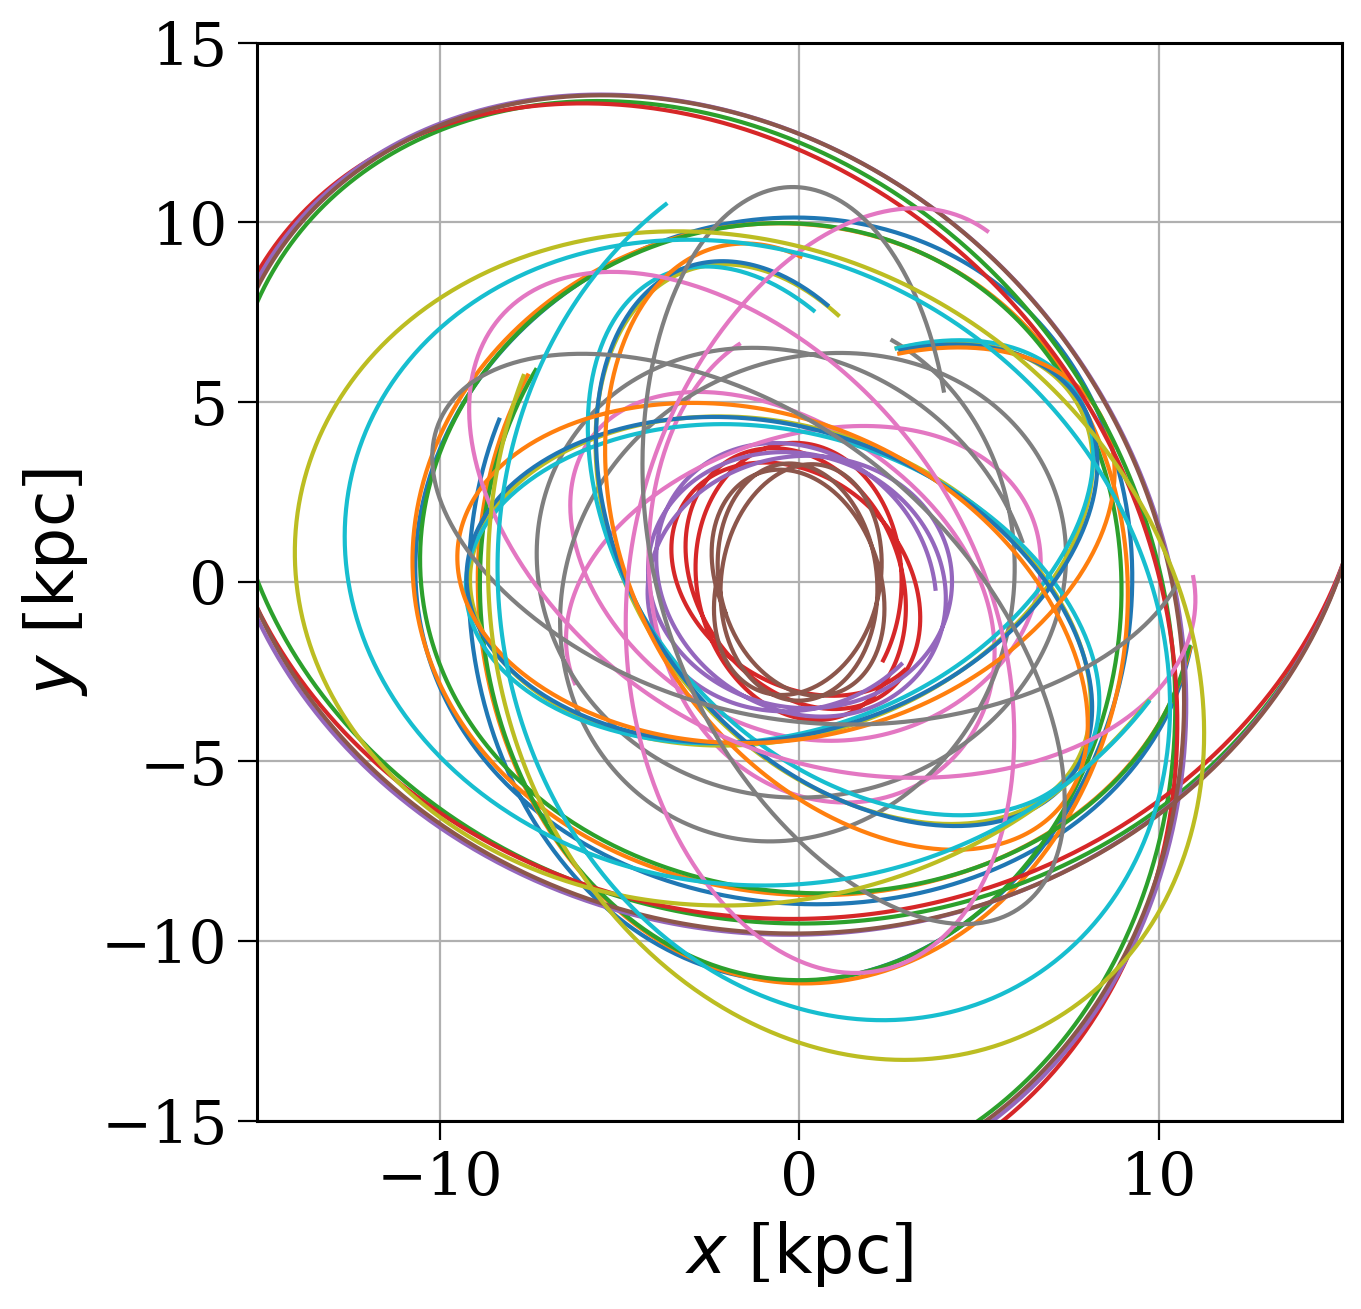

In [13]:
fig, ax = plt.subplots(figsize=(12, 7))
orbits.cylindrical.plot(["rho", "z"], axes=[ax])
plt.show()

fig, ax = plt.subplots(figsize=(7, 7))
orbits.plot(["x", "y"], axes=[ax])
ax.set_aspect("equal")
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.grid()
plt.show()

# Actual reverse integration